In [5]:
import os
from configparser import ConfigParser

parser = ConfigParser()
parser.read('notebook.cfg')

general_path = parser.get('GTZAN', 'database')

print(list(os.listdir(f'{general_path}/genres_original/')))

['pop', '.DS_Store', 'metal', 'disco', 'blues', 'reggae', 'classical', 'rock', 'hiphop', 'country', 'jazz']


# Exploring Audio Data

we will use `Librosa` library to process Wav files

In [6]:
import wave

def get_wav_duration(file_path):
    with wave.open(file_path, 'rb') as audio_file:
        # Get the number of frames in the audio file
        num_frames = audio_file.getnframes()

        # Get the sample rate of the audio file
        sample_rate = audio_file.getframerate()

        # Calculate the duration in seconds
        duration = num_frames / float(sample_rate)

        return duration

In [7]:
# File pathing
import librosa
import numpy as np

file_path = f'{general_path}/genres_original/jazz/jazz.00001.wav'

y, sr = librosa.load(file_path)
duration = get_wav_duration(file_path)

print('y:', y, '\n')
print('y shape:', np.shape(y), '\n')
print('Sample Rate (KHz):', sr, '\n')
print('Check Len of Audio', duration)

y: [0.00241089 0.00549316 0.00866699 ... 0.00201416 0.00250244 0.00119019] 

y shape: (661794,) 

Sample Rate (KHz): 22050 

Check Len of Audio 30.013333333333332


In [9]:
# Trim the silence of the audio

audio_file, _ = librosa.effects.trim(y)

# the result is an numpy ndarray
print('Audio File:', audio_file, '\n')
print('Audio File shape:', np.shape(audio_file))

Audio File: [0.00241089 0.00549316 0.00866699 ... 0.00201416 0.00250244 0.00119019] 

Audio File shape: (661794,)


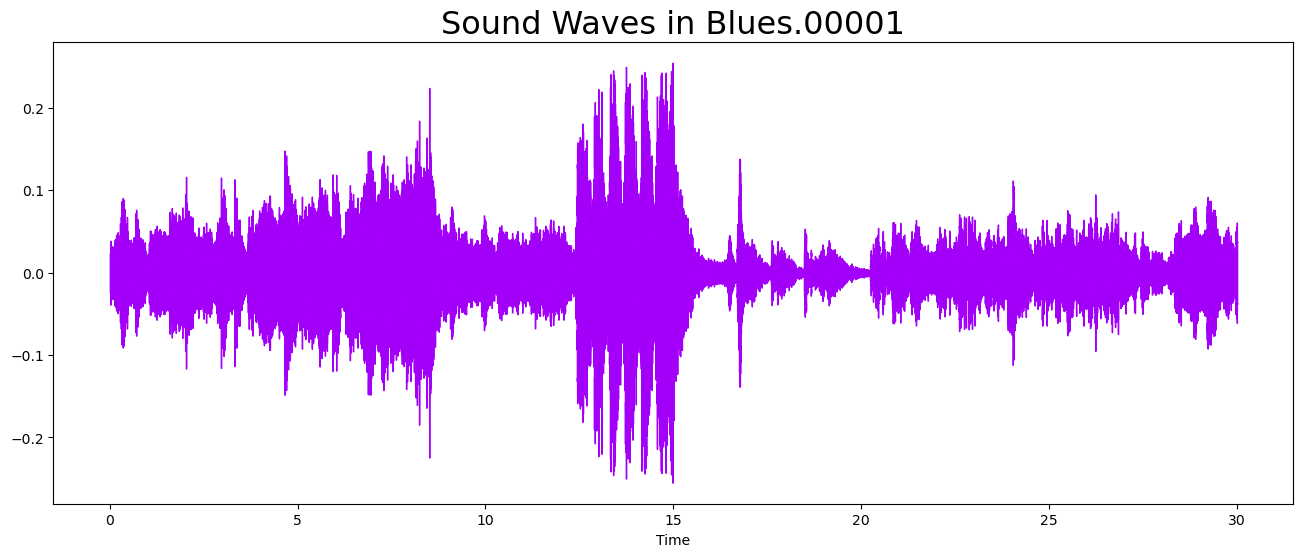

In [10]:
import matplotlib.pyplot as plt

plt.figure(figsize = (16, 6))
librosa.display.waveshow(y = audio_file, sr = sr, color = "#A300F9");
plt.title(f"Sound Waves in Blues.00001", fontsize = 23);

# Audio Features
In extracting Audio Features, there are three major components we need to find out from the audio (.wav) to determine its Genre.
- Instrumentation
- Rhythm
- Melody

Instrumentation can be derived from the **Harmonics and Percussive** components of the audio. 

Rhythm can be derived from **tempo and beat locations** from the audio file. 

Melody can by extractng the pitches around the audio file per second. However, in this case we will be using **MFCC (Mel-Frequency Cepstral Coefficient)**. MFCCs, on the other hand, are more focused on capturing timbral and spectral information rather than pitch information.

In [11]:
# Chroma FTFT Mean and Variance

chroma_stft = librosa.feature.chroma_stft(y=audio_file, sr=sr)
chroma_stft_mean = np.mean(chroma_stft)
chroma_stft_var = np.var(chroma_stft)

chroma_stft_mean, chroma_stft_var

(0.32803315, 0.08655912)

In [12]:
# RMS Mean and Variance
rms = librosa.feature.rms(y=audio_file)
rms_mean = np.mean(rms)
rms_var = np.var(rms)

rms_mean, rms_var

(0.022786215, 0.00023893478)

In [13]:
# Spectral Values
spectral_centroids = librosa.feature.spectral_centroid(y=audio_file, sr=sr)
spectral_bandwidths = librosa.feature.spectral_bandwidth(y=audio_file, sr=sr)

# Spectral Centoroid mean and variance
spectral_centroid_mean = np.mean(spectral_centroids)
spectral_centroid_var = np.var(spectral_centroids)

# Spectral Bandwidth mean and variance
spectral_bandwidth_mean = np.mean(spectral_bandwidths)
spectral_bandwidth_var = np.var(spectral_bandwidths)

spectral_centroid_mean, spectral_centroid_var, spectral_bandwidth_mean, spectral_bandwidth_var

(1266.4884317094, 301890.4945165272, 1691.2917036170227, 217327.43598749567)

In [14]:
# Rolloff

rolloff = librosa.feature.spectral_rolloff(y=audio_file, sr=sr)

rolloff_mean = np.mean(rolloff)
rolloff_var = np.var(rolloff)

rolloff_mean, rolloff_var
# rolloff

(2410.6862220852668, 1779535.0154773328)

In [15]:
# Zero Crossing Rate

zero_crossing_rate = librosa.zero_crossings(y=audio_file, pad=False)

zero_crossing_rate_mean = np.mean(zero_crossing_rate)
zero_crossing_rate_var = np.var(zero_crossing_rate)

zero_crossing_rate_mean, zero_crossing_rate_var

(0.05939612628703192, 0.05586822646912688)

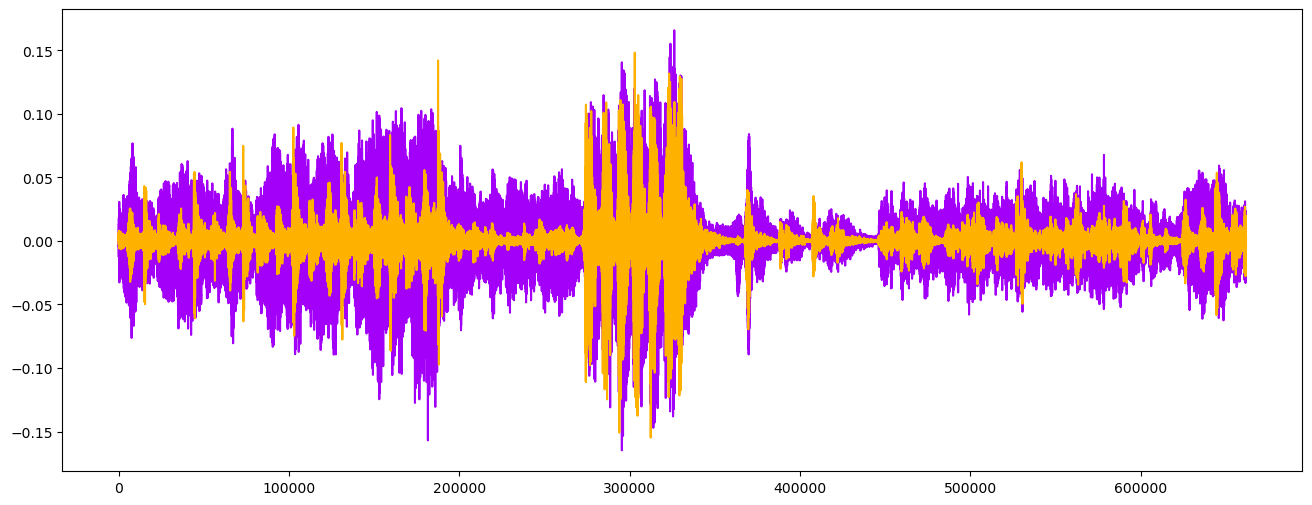

In [16]:
# Harmonic and Percussive

harmonic, percussive = librosa.effects.hpss(audio_file)

harmonic_mean = np.mean(harmonic)
harmonic_var = np.var(harmonic)
perceptron_mean = np.mean(percussive)
perceptron_var = np.var(percussive)

harmonic_mean, harmonic_var, perceptron_mean, perceptron_var

plt.figure(figsize = (16, 6))
plt.plot(harmonic, color = '#A300F9');
plt.plot(percussive, color = '#FFB100');

In [17]:
# Estimate the beat frames
tempo, beat_frames = librosa.beat.beat_track(y=audio_file, sr=sr)

tempo

135.99917763157896

In [18]:
# MFCC

mfccs = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=20)
mfccs_mean = np.mean(mfccs, axis=1)
mfccs_var = np.var(mfccs, axis=1)

mfccs_mean, mfccs_var

(array([-3.4575772e+02,  1.4697388e+02, -5.0894165e-01,  2.2634275e+01,
         5.8155456e+00,  1.0363343e+01, -1.5792395e-01, -1.7160186e+00,
        -6.1198440e+00, -5.2288598e-01,  1.0385451e+00,  1.2205253e+00,
        -1.9355481e+00, -5.5469632e+00, -4.4041710e+00, -2.5870383e+00,
        -5.1892538e+00, -5.4284158e+00, -3.1186113e+00, -7.9857188e-01],
       dtype=float32),
 array([10113.175   ,  1288.6447  ,   521.9457  ,   134.67111 ,
           96.69115 ,    55.179626,    53.92851 ,    57.05857 ,
           46.948147,    48.356506,    52.090645,    46.22394 ,
           64.4804  ,    62.344246,    53.580093,    44.14142 ,
           43.2566  ,    45.67901 ,    52.634304,    98.261055],
       dtype=float32))

In [19]:
root_dir = f'{general_path}/genres_original'

def extract(genre, filepath):
    datas = []
    header = ['filename', 'samplerate', 'length']
    file_path = f'{general_path}/genres_original/{genre}/{filepath}.wav'

    # Loading the data
    y, sr = librosa.load(file_path)
    audio_file, _ = librosa.effects.trim(y)

    # Filename append
    datas.append(filepath)

    # Sample Rate append
    datas.append(sr)

    # Length
    datas.append(np.shape(audio_file)[0])

    # Chroma FTFT Mean and Variance append
    chroma_stft = librosa.feature.chroma_stft(y=audio_file, sr=sr)
    chroma_stft_mean = np.mean(chroma_stft)
    chroma_stft_var = np.var(chroma_stft)

    datas.append(chroma_stft_mean)
    datas.append(chroma_stft_var)

    # RMS Mean and Variance append
    rms = librosa.feature.rms(y=audio_file)
    rms_mean = np.mean(rms)
    rms_var = np.var(rms)

    datas.append(rms_mean)
    datas.append(rms_var)

    # Spectral Values append
    spectral_centroids = librosa.feature.spectral_centroid(y=audio_file, sr=sr)
    spectral_bandwidths = librosa.feature.spectral_bandwidth(y=audio_file, sr=sr)

    # Spectral Centoroid mean and variance
    spectral_centroid_mean = np.mean(spectral_centroids)
    spectral_centroid_var = np.var(spectral_centroids)

    # Spectral Bandwidth Mean and Variance append
    spectral_bandwidth_mean = np.mean(spectral_bandwidths)
    spectral_bandwidth_var = np.var(spectral_bandwidths)

    datas.append(spectral_centroid_mean)
    datas.append(spectral_centroid_var)
    datas.append(spectral_bandwidth_mean)
    datas.append(spectral_bandwidth_var)

    # Rolloff append
    rolloff = librosa.feature.spectral_rolloff(y=audio_file, sr=sr)

    rolloff_mean = np.mean(rolloff)
    rolloff_var = np.var(rolloff)

    datas.append(rolloff_mean)
    datas.append(rolloff_var)

    # Zero Crossing Rate and Mean append
    zero_crossing_rate = librosa.zero_crossings(y=audio_file, pad=False)

    zero_crossing_rate_mean = np.mean(zero_crossing_rate)
    zero_crossing_rate_var = np.var(zero_crossing_rate)

    datas.append(zero_crossing_rate_mean)
    datas.append(zero_crossing_rate_var)

    # Harmonic and Percussive append
    harmonic, percussive = librosa.effects.hpss(audio_file)

    harmonic_mean = np.mean(harmonic)
    harmonic_var = np.var(harmonic)
    perceptron_mean = np.mean(percussive)
    perceptron_var = np.var(percussive)

    datas.append(harmonic_mean)
    datas.append(harmonic_var)
    datas.append(perceptron_mean)
    datas.append(perceptron_var)

    # Tempo
    tempo, beat_frames = librosa.beat.beat_track(y=audio_file, sr=sr)
    datas.append(tempo)

    # MFCC
    mfccs = librosa.feature.mfcc(y=audio_file, sr=sr, n_mfcc=20)
    mfccs_mean = np.mean(mfccs, axis=1)
    mfccs_var = np.var(mfccs, axis=1)

    for _mean in mfccs_mean:
        datas.append(_mean)

    for _var in mfccs_var:
        datas.append(_var)

    # Genre
    datas.append(genre)

    return datas

In [20]:
all_data = []
# ['pop', 'metal', 'disco', 'blues', 'reggae', 'classical', 'rock', 'hiphop', 'country', 'jazz']
for genre in list(os.listdir(f'{general_path}/genres_original/')):
# for genre in ['jazz']:
    for audio in range(0, 100):
        all_data.append(extract(genre, f'{genre}.{str(audio).zfill(5)}'))
        print(f'Extracted {genre}.{str(audio).zfill(5)}')

Extracted pop.00000
Extracted pop.00001
Extracted pop.00002
Extracted pop.00003
Extracted pop.00004
Extracted pop.00005
Extracted pop.00006
Extracted pop.00007
Extracted pop.00008
Extracted pop.00009
Extracted pop.00010
Extracted pop.00011
Extracted pop.00012
Extracted pop.00013
Extracted pop.00014
Extracted pop.00015
Extracted pop.00016
Extracted pop.00017
Extracted pop.00018
Extracted pop.00019
Extracted pop.00020
Extracted pop.00021
Extracted pop.00022
Extracted pop.00023
Extracted pop.00024
Extracted pop.00025
Extracted pop.00026
Extracted pop.00027
Extracted pop.00028
Extracted pop.00029
Extracted pop.00030
Extracted pop.00031
Extracted pop.00032
Extracted pop.00033
Extracted pop.00034
Extracted pop.00035
Extracted pop.00036
Extracted pop.00037
Extracted pop.00038
Extracted pop.00039
Extracted pop.00040
Extracted pop.00041
Extracted pop.00042
Extracted pop.00043
Extracted pop.00044
Extracted pop.00045
Extracted pop.00046
Extracted pop.00047
Extracted pop.00048
Extracted pop.00049


/var/folders/m7/zdxv2v7533n6g6x152zvnktm0000gn/T/ipykernel_64452/79508564.py:9: UserWarning: PySoundFile failed. Trying audioread instead.
  y, sr = librosa.load(file_path)
/Users/jr/opt/anaconda3/lib/python3.9/site-packages/librosa/core/audio.py:184: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


NotADirectoryError: [Errno 20] Not a directory: '/Users/jr/Downloads/Data/genres_original/.DS_Store/.DS_Store.00000.wav'

In [21]:
len(all_data)

100

In [22]:
import csv

file_path = 'anjaaay.csv'

# Open the CSV file in append mode
with open(file_path, 'a', newline='') as file:
    writer = csv.writer(file)
    
    header = ['filename', 'samplerate', 'length', 'chroma_stft_mean', 'chroma_stft_var', 'rms_mean', 
              'rms_var', 'spectral_centroid_mean', 'spectral_centroid_var', 'spectral_bandwidth_mean', 
              'spectral_bandwidth_var', 'rolloff_mean', 'rolloff_var', 'zero_crossing_rate_mean', 'zero_crossing_rate_var', 
              'harmonic_mean', 'harmonic_var', 'perceptron_mean', 'perceptron_var', 'tempo', 'mcff_mean_01', 'mcff_mean_02', 
              'mcff_mean_03', 'mcff_mean_04', 'mcff_mean_05', 'mcff_mean_06', 'mcff_mean_07', 'mcff_mean_08', 'mcff_mean_09', 
              'mcff_mean_10', 'mcff_mean_11', 'mcff_mean_12', 'mcff_mean_13', 'mcff_mean_14', 'mcff_mean_15', 'mcff_mean_16', 
              'mcff_mean_17', 'mcff_mean_18', 'mcff_mean_19', 'mcff_mean_20', 'mcff_var_01', 'mcff_var_02', 'mcff_var_03', 
              'mcff_var_04', 'mcff_var_05', 'mcff_var_06', 'mcff_var_07', 'mcff_var_08', 'mcff_var_09', 'mcff_var_10', 
              'mcff_var_11', 'mcff_var_12', 'mcff_var_13', 'mcff_var_14', 'mcff_var_15', 'mcff_var_16', 'mcff_var_17',
              'mcff_var_18', 'mcff_var_19', 'mcff_var_20', 'genre']
    
    writer.writerow(header)

    # Iterate over each list in the data
    for row in all_data:
        writer.writerow(row)


In [23]:
import pandas as pd

# Specify the file path of the CSV file
file_path = 'anjaaay.csv'

# Read the CSV file into a DataFrame
df = pd.read_csv(file_path)

# Print the DataFrame
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1100 entries, 0 to 1099
Data columns (total 61 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   filename                 1100 non-null   object
 1   samplerate               1100 non-null   object
 2   length                   1100 non-null   object
 3   chroma_stft_mean         1100 non-null   object
 4   chroma_stft_var          1100 non-null   object
 5   rms_mean                 1100 non-null   object
 6   rms_var                  1100 non-null   object
 7   spectral_centroid_mean   1100 non-null   object
 8   spectral_centroid_var    1100 non-null   object
 9   spectral_bandwidth_mean  1100 non-null   object
 10  spectral_bandwidth_var   1100 non-null   object
 11  rolloff_mean             1100 non-null   object
 12  rolloff_var              1100 non-null   object
 13  zero_crossing_rate_mean  1100 non-null   object
 14  zero_crossing_rate_var   1100 non-null  

# Prediction

In [24]:
data = pd.read_csv('anjaaay.csv')
data.head()

,filename,samplerate,length,chroma_stft_mean,chroma_stft_var,rms_mean,rms_var,spectral_centroid_mean,spectral_centroid_var,spectral_bandwidth_mean,...,mcff_var_12,mcff_var_13,mcff_var_14,mcff_var_15,mcff_var_16,mcff_var_17,mcff_var_18,mcff_var_19,mcff_var_20,genre
0,pop.00000,22050,661504,0.3896536,0.090932846,0.18578337,0.007515183,3422.0718638850176,1080118.0072290867,3409.782870940985,...,74.16853,71.35774,49.635887,61.33307,112.50387,92.407234,112.86938,87.59621,88.58237,pop
1,pop.00001,22050,661504,0.41301465,0.09765839,0.26224416,0.014840736,3702.0628032503205,1404082.167116574,3431.853403597145,...,108.30502,116.196915,98.49339,93.33558,129.69032,205.32909,170.98001,166.52542,155.19604,pop
2,pop.00002,22050,661504,0.41781056,0.09356617,0.21508695,0.0065945433,3214.0196781876043,1006432.6030867868,3269.5879936798506,...,63.3093,69.27788,87.49524,81.242455,94.6189,71.94916,58.108,43.981358,46.303802,pop
3,pop.00003,22050,661504,0.40990362,0.081139386,0.12934098,0.001810816,1837.4928261899654,787403.7993950505,2067.3993702071366,...,60.197083,57.974556,68.86274,66.48117,68.72704,77.792885,72.01733,61.28334,60.909004,pop
4,pop.00004,22050,661504,0.38440332,0.08355704,0.21107702,0.002575806,2753.2347229442976,717809.5578023181,2861.556999695085,...,38.534035,34.502907,41.290123,32.606133,47.63221,36.21528,43.70539,52.989506,48.691204,pop


# Machine Learning Classification

In [33]:
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import SGDClassifier, LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from xgboost import XGBClassifier, XGBRFClassifier
from xgboost import plot_tree, plot_importance

from sklearn.metrics import confusion_matrix, accuracy_score, roc_auc_score, roc_curve
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import RFE

In [34]:
data = pd.read_csv(f'{general_path}/features_3_sec.csv')
data = data.iloc[0:, 1:] 
data.head()

,length,chroma_stft_mean,chroma_stft_var,rms_mean,rms_var,spectral_centroid_mean,spectral_centroid_var,spectral_bandwidth_mean,spectral_bandwidth_var,rolloff_mean,...,mfcc16_var,mfcc17_mean,mfcc17_var,mfcc18_mean,mfcc18_var,mfcc19_mean,mfcc19_var,mfcc20_mean,mfcc20_var,label
0,66149,0.335406,0.091048,0.130405,0.003521,1773.065032,167541.630869,1972.744388,117335.771563,3714.560359,...,39.687145,-3.241280,36.488243,0.722209,38.099152,-5.050335,33.618073,-0.243027,43.771767,blues
1,66149,0.343065,0.086147,0.112699,0.001450,1816.693777,90525.690866,2010.051501,65671.875673,3869.682242,...,64.748276,-6.055294,40.677654,0.159015,51.264091,-2.837699,97.030830,5.784063,59.943081,blues
2,66149,0.346815,0.092243,0.132003,0.004620,1788.539719,111407.437613,2084.565132,75124.921716,3997.639160,...,67.336563,-1.768610,28.348579,2.378768,45.717648,-1.938424,53.050835,2.517375,33.105122,blues
3,66149,0.363639,0.086856,0.132565,0.002448,1655.289045,111952.284517,1960.039988,82913.639269,3568.300218,...,47.739452,-3.841155,28.337118,1.218588,34.770935,-3.580352,50.836224,3.630866,32.023678,blues
4,66149,0.335579,0.088129,0.143289,0.001701,1630.656199,79667.267654,1948.503884,60204.020268,3469.992864,...,30.336359,0.664582,45.880913,1.689446,51.363583,-3.392489,26.738789,0.536961,29.146694,blues


In [35]:
y = data['label'] # genre variable.
X = data.loc[:, data.columns != 'label'] #select all columns but not the labels

#### NORMALIZE X ####

# Normalize so everything is on the same scale. 

cols = X.columns
min_max_scaler = preprocessing.MinMaxScaler()
np_scaled = min_max_scaler.fit_transform(X)

# new data frame with the new scaled data. 
X = pd.DataFrame(np_scaled, columns = cols)

In [36]:
from sklearn.preprocessing import LabelEncoder

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Encode string labels into numerical labels
label_encoder = LabelEncoder()
y_train = label_encoder.fit_transform(y_train)
y_test = label_encoder.transform(y_test)


## Model Assessment Section

In [37]:
def model_assess(model, title = "Default"):
    model.fit(X_train, y_train)
    preds = model.predict(X_test)
    #print(confusion_matrix(y_test, preds))
    print('Accuracy', title, ':', round(accuracy_score(y_test, preds), 5), '\n')

In [38]:
# Naive Bayes
nb = GaussianNB()
model_assess(nb, "Naive Bayes")

# Stochastic Gradient Descent
sgd = SGDClassifier(max_iter=5000, random_state=0)
model_assess(sgd, "Stochastic Gradient Descent")

# KNN
knn = KNeighborsClassifier(n_neighbors=19)
model_assess(knn, "KNN")

# Decission trees
tree = DecisionTreeClassifier()
model_assess(tree, "Decission trees")

# Random Forest
rforest = RandomForestClassifier(n_estimators=1000, max_depth=10, random_state=0)
model_assess(rforest, "Random Forest")

# Support Vector Machine
svm = SVC(decision_function_shape="ovo")
model_assess(svm, "Support Vector Machine")

# Logistic Regression
lg = LogisticRegression(random_state=0, solver='lbfgs', multi_class='multinomial')
model_assess(lg, "Logistic Regression")

# Neural Nets
nn = MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(5000, 10), random_state=1)
model_assess(nn, "Neural Nets")

Accuracy Naive Bayes : 0.51952 

Accuracy Stochastic Gradient Descent : 0.65532 



/Users/jr/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


Accuracy KNN : 0.80581 

Accuracy Decission trees : 0.64364 

Accuracy Random Forest : 0.81415 

Accuracy Support Vector Machine : 0.75409 



/Users/jr/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Accuracy Logistic Regression : 0.6977 

Accuracy Neural Nets : 0.68235 



/Users/jr/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


In [39]:
# Cross Gradient Booster
xgb = XGBClassifier(n_estimators=1000, learning_rate=0.05)
model_assess(xgb, "Cross Gradient Booster")

# Cross Gradient Booster (Random Forest)
xgbrf = XGBRFClassifier(objective= 'multi:softmax')
model_assess(xgbrf, "Cross Gradient Booster (Random Forest)")

Accuracy Cross Gradient Booster : 0.90123 

Accuracy Cross Gradient Booster (Random Forest) : 0.74908 



Accuracy : 0.90123 



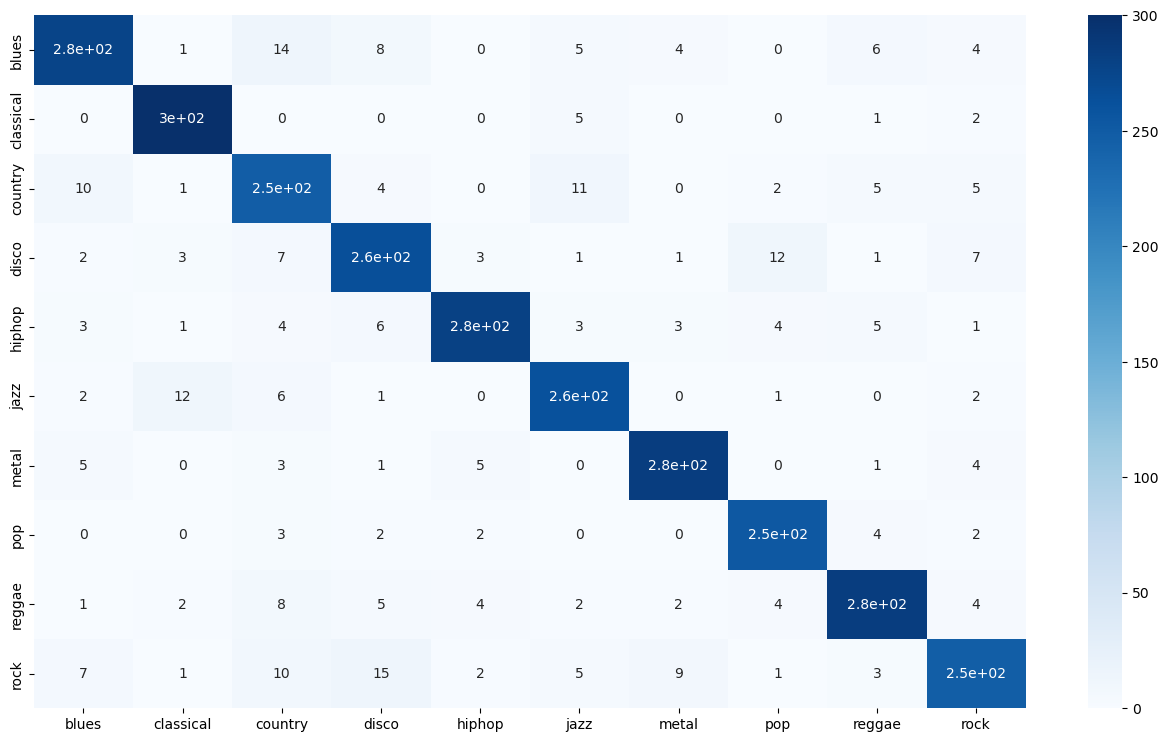

In [40]:
import seaborn as sns
# Final model
xgb = XGBClassifier(n_estimators=1000, learning_rate=0.05)
xgb.fit(X_train, y_train)

preds = xgb.predict(X_test)

print('Accuracy', ':', round(accuracy_score(y_test, preds), 5), '\n')

# Confusion Matrix
confusion_matr = confusion_matrix(y_test, preds) #normalize = 'true'
plt.figure(figsize = (16, 9))
sns.heatmap(confusion_matr, cmap="Blues", annot=True, 
            xticklabels = ["blues", "classical", "country", "disco", "hiphop", "jazz", "metal", "pop", "reggae", "rock"],
           yticklabels=["blues", "classical", "country", "disco", "hiphop", "jazz", "metal", "pop", "reggae", "rock"]);
plt.savefig("conf matrix")

# Recommender System

In [60]:
# Libraries
import IPython.display as ipd
from sklearn.metrics.pairwise import cosine_similarity
from sklearn import preprocessing

# Read data
data = pd.read_csv(f'{general_path}/features_30_sec.csv', index_col='filename')

# Extract labels
labels = data[['label']]

# Drop labels from original dataframe
data = data.drop(columns=['length','label'])
data.head()

# Scale the data
data_scaled=preprocessing.scale(data)
print('Scaled data type:', type(data_scaled))

Scaled data type: <class 'numpy.ndarray'>


In [42]:
print(data_scaled)

[[-0.35013678  0.31258717 -0.01068969 ... -0.30059734  0.60406407
  -0.51298758]
 [-0.46248155  1.11757233 -0.53285232 ... -0.40708699  0.42412706
  -0.53842129]
 [-0.18422456 -0.13770124  0.67997762 ... -0.52729705 -0.29618888
  -0.8749539 ]
 ...
 [ 0.65463736 -1.43198917 -0.75062494 ... -0.63865065 -0.26361549
  -0.89060474]
 [-0.19833855  0.66814351 -0.71697762 ... -0.5114848  -0.65064889
  -0.63768256]
 [-0.2483391  -0.05894495 -1.1648952  ...  0.16033426  0.5868411
  -0.4526752 ]]


In [43]:
# Cosine similarity
similarity = cosine_similarity(data_scaled)
print("Similarity shape:", similarity.shape)

# Convert into a dataframe and then set the row index and column names as labels
sim_df_labels = pd.DataFrame(similarity)
sim_df_names = sim_df_labels.set_index(labels.index)
sim_df_names.columns = labels.index

sim_df_names.head(10)

Similarity shape: (1000, 1000)


filename,blues.00000.wav,blues.00001.wav,blues.00002.wav,blues.00003.wav,blues.00004.wav,blues.00005.wav,blues.00006.wav,blues.00007.wav,blues.00008.wav,blues.00009.wav,...,rock.00090.wav,rock.00091.wav,rock.00092.wav,rock.00093.wav,rock.00094.wav,rock.00095.wav,rock.00096.wav,rock.00097.wav,rock.00098.wav,rock.00099.wav
filename,,,,,,,,,,,,,,,,,,,,,
blues.00000.wav,1.000000,0.049231,0.589618,0.284862,0.025561,-0.346688,-0.219483,-0.167626,0.641877,-0.097889,...,-0.082829,0.546169,0.578558,0.662590,0.571629,0.610942,0.640835,0.496294,0.284958,0.304098
blues.00001.wav,0.049231,1.000000,-0.096834,0.520903,0.080749,0.307856,0.318286,0.415258,0.120649,0.404168,...,-0.098111,-0.325126,-0.370792,-0.191698,-0.330834,-0.077301,-0.222119,-0.302573,0.499562,0.311723
blues.00002.wav,0.589618,-0.096834,1.000000,0.210411,0.400266,-0.082019,-0.028061,0.104446,0.468113,-0.132532,...,-0.032408,0.561074,0.590779,0.583293,0.514537,0.495707,0.566837,0.589983,0.216378,0.321069
blues.00003.wav,0.284862,0.520903,0.210411,1.000000,0.126437,0.134796,0.300746,0.324566,0.352758,0.295184,...,-0.320107,-0.206516,-0.151132,0.041986,-0.172515,-0.000287,0.020515,-0.107821,0.502279,0.183210
blues.00004.wav,0.025561,0.080749,0.400266,0.126437,1.000000,0.556066,0.482195,0.623455,0.029703,0.471657,...,0.087605,0.017366,0.138035,0.104684,-0.034594,0.063454,0.063546,0.172944,0.153192,0.061785
blues.00005.wav,-0.346688,0.307856,-0.082019,0.134796,0.556066,1.000000,0.686479,0.664843,-0.139911,0.532227,...,-0.112608,-0.281897,-0.253468,-0.206757,-0.358557,-0.231012,-0.272209,-0.175960,0.176351,0.052447
blues.00006.wav,-0.219483,0.318286,-0.028061,0.300746,0.482195,0.686479,1.000000,0.857684,-0.086546,0.698669,...,-0.183924,-0.341632,-0.256252,-0.211844,-0.359632,-0.251086,-0.291506,-0.203014,0.252338,0.065553
blues.00007.wav,-0.167626,0.415258,0.104446,0.324566,0.623455,0.664843,0.857684,1.000000,-0.116395,0.582683,...,-0.151804,-0.334930,-0.199243,-0.174564,-0.341476,-0.180628,-0.256171,-0.155732,0.239441,0.068649
blues.00008.wav,0.641877,0.120649,0.468113,0.352758,0.029703,-0.139911,-0.086546,-0.116395,1.000000,-0.012707,...,-0.095039,0.501127,0.452141,0.594235,0.562747,0.619450,0.612170,0.461320,0.454673,0.403862


In [44]:
def find_similar_songs(name):
    # Find songs most similar to another song
    series = sim_df_names[name].sort_values(ascending = False)
    
    # Remove cosine similarity == 1 (songs will always have the best match with themselves)
    series = series.drop(name)
    
    # Display the 5 top matches 
    print("\n*******\nSimilar songs to ", name)
    print(series.head(5))

In [61]:
# pop.00019 - Britney Spears "Hit me baby one more time"
find_similar_songs('pop.00019.wav') 

ipd.Audio(f'{general_path}/genres_original/pop/pop.00019.wav')


*******
Similar songs to  pop.00019.wav
filename
pop.00023.wav    0.862836
pop.00034.wav    0.860499
pop.00078.wav    0.829135
pop.00088.wav    0.824456
pop.00091.wav    0.802269
Name: pop.00019.wav, dtype: float64


In [64]:
ipd.Audio(f'{general_path}/genres_original/pop/pop.00078.wav')